In [1]:
%matplotlib inline
from fastai.basics import *

In this part of the lecture we explain Stochastic Gradient Descent (SGD) which is an **optimization** method commonly used in neural networks. We will illustrate the concepts with concrete examples.

#  Linear Regression problem

The goal of linear regression is to fit a line to a set of points.

In [2]:
n=100

In [3]:
x = torch.ones(n,2) 
x[:,0].uniform_(-1.,1)
x[:5]

tensor([[-0.3019,  1.0000],
        [-0.2751,  1.0000],
        [-0.5213,  1.0000],
        [ 0.9717,  1.0000],
        [ 0.9295,  1.0000]])

In [4]:
a = tensor(3.,2); a

tensor([3., 2.])

In [5]:
y = x@a + torch.rand(n)# @ means matrix product

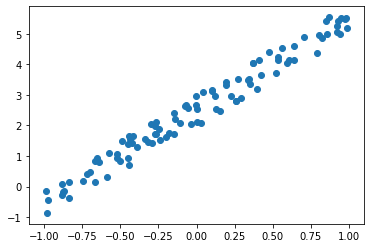

In [6]:
plt.scatter(x[:,0], y);

You want to find **parameters** (weights) `a` such that you minimize the *error* between the points and the line `x@a`. Note that here `a` is unknown. For a regression problem the most common *error function* or *loss function* is the **mean squared error**. 

In [7]:
def mse(y_hat, y): return ((y_hat-y)**2).mean()

Suppose we believe `a = (-1.0,1.0)` then we can compute `y_hat` which is our *prediction* and then compute our error.

In [8]:
a = tensor(-1.,1)

In [21]:
a.type()

'torch.FloatTensor'

In [9]:
y_hat = x@a
mse(y_hat, y)

tensor(7.3728)

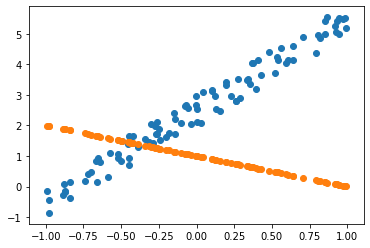

In [22]:
plt.scatter(x[:,0],y)
plt.scatter(x[:,0],y_hat);

So far we have specified the *model* (linear regression) and the *evaluation criteria* (or *loss function*). Now we need to handle *optimization*; that is, how do we find the best values for `a`? How do we find the best *fitting* linear regression.

# Gradient Descent

We would like to find the values of `a` that minimize `mse_loss`.

**Gradient descent** is an algorithm that minimizes functions. Given a function defined by a set of parameters, gradient descent starts with an initial set of parameter values and iteratively moves toward a set of parameter values that minimize the function. This iterative minimization is achieved by taking steps in the negative direction of the function gradient.

Here is gradient descent implemented in [PyTorch](http://pytorch.org/).

In [23]:
a = nn.Parameter(a); a

Parameter containing:
tensor([-1.,  1.], requires_grad=True)

In [24]:
def update():
    y_hat = x@a
    loss = mse(y, y_hat)
    if t % 10 == 0: print(loss)
    loss.backward()
    with torch.no_grad():
        a.sub_(lr * a.grad)
        a.grad.zero_()

In [25]:
lr = 1e-1
for t in range(100): update()

tensor(7.3728, grad_fn=<MeanBackward0>)
tensor(1.4631, grad_fn=<MeanBackward0>)
tensor(0.4581, grad_fn=<MeanBackward0>)
tensor(0.1890, grad_fn=<MeanBackward0>)
tensor(0.1151, grad_fn=<MeanBackward0>)
tensor(0.0948, grad_fn=<MeanBackward0>)
tensor(0.0892, grad_fn=<MeanBackward0>)
tensor(0.0877, grad_fn=<MeanBackward0>)
tensor(0.0872, grad_fn=<MeanBackward0>)
tensor(0.0871, grad_fn=<MeanBackward0>)


In [38]:
x@a

tensor([ 1.6342,  1.7134,  0.9845,  5.4048,  5.2800,  4.2834,  3.3368,  1.9260,
         0.5648,  3.5218,  2.9049,  4.9155,  3.5377,  1.7489,  4.4181,  1.2098,
         4.9575,  2.2147, -0.4051, -0.0526,  1.5192,  0.8334,  1.8099,  3.9449,
         3.7874,  1.7997,  4.0643,  5.4353,  5.2512,  2.0918,  2.5326,  2.3041,
         1.2115,  3.5720,  5.0524,  3.3885,  0.4624,  3.1048,  4.3192,  5.4541,
         2.8822,  5.3320,  0.0535,  2.5393, -0.0830,  4.1943,  0.9918,  1.5936,
        -0.0870,  1.7449,  4.8689,  2.3244,  0.5478,  0.6031,  4.6238,  2.3662,
         3.6301,  1.2283,  1.1986,  3.1987,  2.8371,  0.0506,  2.9888,  1.0467,
        -0.0628,  4.4267,  4.1180,  0.6382,  1.2670,  0.3289,  3.1004,  5.3221,
         1.3792, -0.3771,  2.4186,  2.6519,  2.0971,  5.0571,  2.6088,  4.1015,
         1.9838,  1.7309,  2.5133,  3.7019,  1.0729,  2.1132,  3.7383,  5.2627,
         3.6205,  3.3031,  1.6704,  0.7943,  3.2985,  5.0930,  2.8355, -0.3619,
         0.3994,  1.2903,  1.1905,  2.51

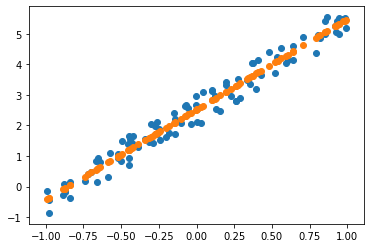

In [40]:
plt.scatter(x[:,0],y)
plt.scatter(x[:,0],x@a.detach().numpy())

## Animate it!

In [18]:
from matplotlib import animation, rc
rc('animation', html='jshtml')

In [45]:
a = nn.Parameter(tensor(-1.,1))

fig = plt.figure()
plt.scatter(x[:,0], y, c='orange')
line, = plt.plot(x[:,0], x@a.detach().numpy())
plt.close()

def animate(i):
    update()
    line.set_ydata(x@a)
    return line,

animation.FuncAnimation(fig, animate, np.arange(0, 100), interval=20)

RuntimeError: bool value of Tensor with more than one value is ambiguous

In practice, we don't calculate on the whole file at once, but we use *mini-batches*.

## Vocab

- Learning rate
- Epoch
- Minibatch
- SGD
- Model / Architecture
- Parameters
- Loss function

For classification problems, we use *cross entropy loss*, also known as *negative log likelihood loss*. This penalizes incorrect confident predictions, and correct unconfident predictions.